<a href="https://colab.research.google.com/github/aayushiz/retail/blob/main/retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name:** Aayushi Gandhi

**Intern at the Sparks Foundation GRIP FEB'21**

**Topic:** Exploratory data analysis on Retail


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
db = pd.read_csv('/content/drive/MyDrive/SampleSuperstore.csv')

In [ ]:
db.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
db.shape

(9994, 13)

Check for null values

In [ ]:
db.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
db.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


**Check for unique values and remove duplicates**

In [ ]:
db.Category.value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [ ]:
db['Sub-Category'].unique() #15

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [ ]:
db['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [ ]:
db.duplicated().sum()

17

In [ ]:
db.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [ ]:
db.drop_duplicates(keep = 'first', inplace = True)
db.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [ ]:
db.duplicated().sum()

0

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


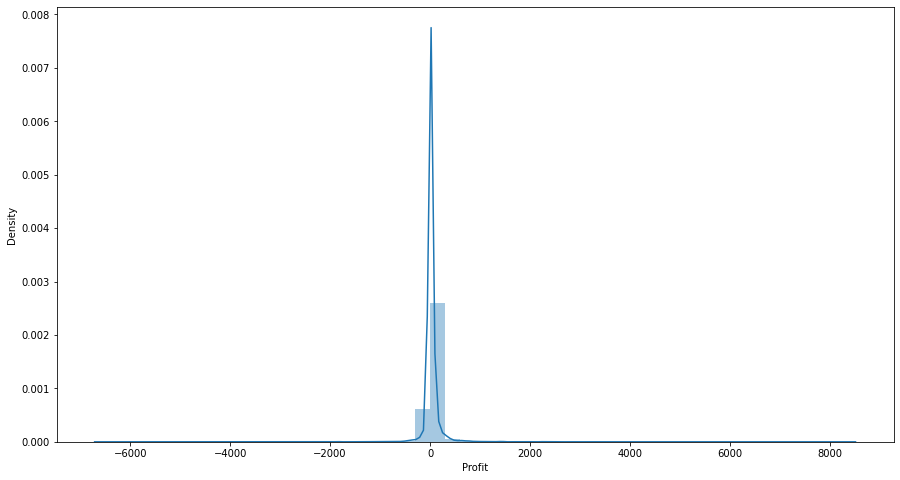

In [ ]:
fig, axes = plt.subplots(figsize=(15,8))
sb.distplot(db.Profit)

In [ ]:
db1 = db.loc[:,['Profit', 'Sales']]
db1.head()

,Profit,Sales
0,41.9136,261.9600
1,219.5820,731.9400
2,6.8714,14.6200
3,-383.0310,957.5775
4,2.5164,22.3680


In [ ]:
db2=db1.sort_values(['Profit'], ascending = False)

In [ ]:
db2.head()

,Profit,Sales
6826,8399.9760,17499.95
8153,6719.9808,13999.96
4190,5039.9856,10499.97
9039,4946.3700,9892.74
4098,4630.4755,9449.95


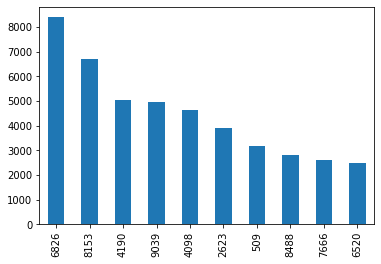

In [ ]:
db2['Profit'].head(10).plot(kind = 'bar')

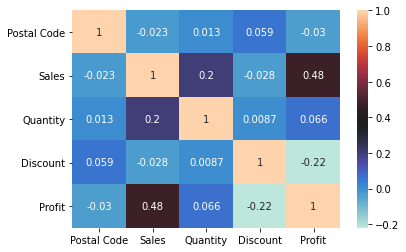

In [ ]:
corr = db.corr()
sb.heatmap(corr, annot= True, cmap = 'icefire')

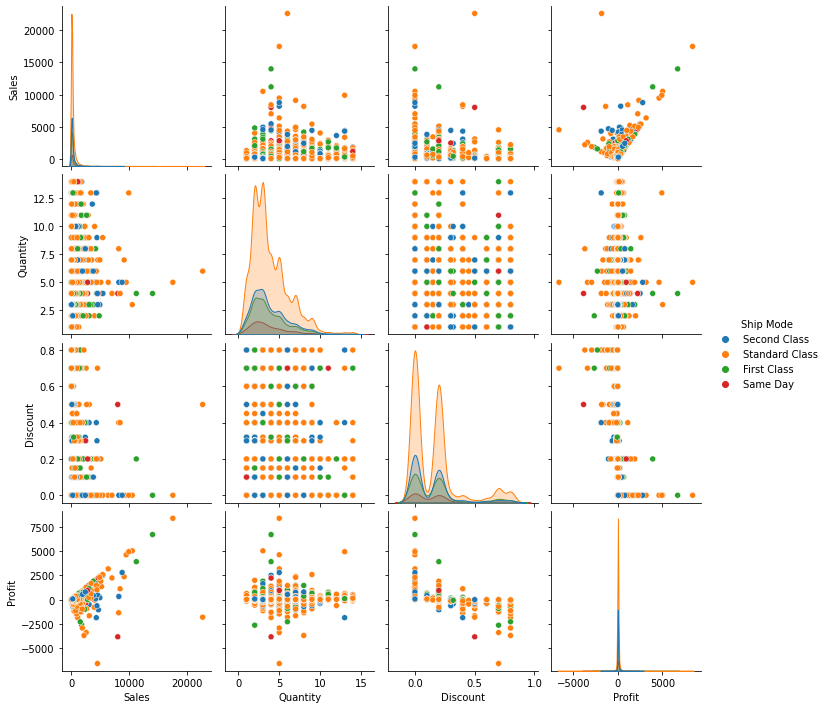

In [ ]:
db= db.drop(['Postal Code'],axis = 1)
sb.pairplot(db, hue= 'Ship Mode')

**Here we can see that consumer has maximum sales**

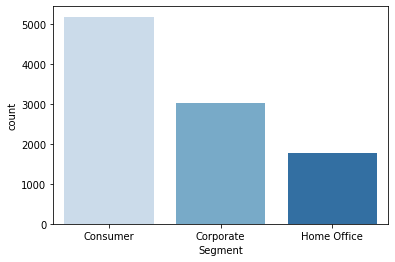

In [ ]:
sb.countplot(x='Segment', data = db, palette = 'Blues')

**Also, Maximum sales is in Office Supply Category**

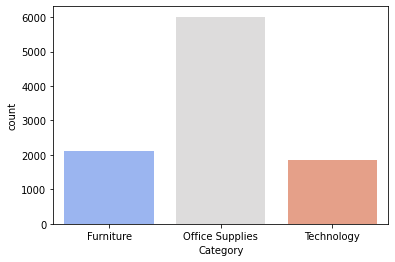

In [ ]:
sb.countplot(x='Category', data = db, palette = 'coolwarm')

**The pie chart shows that Binder, paper and furnishings make the maximum sales in the Sub-Category**

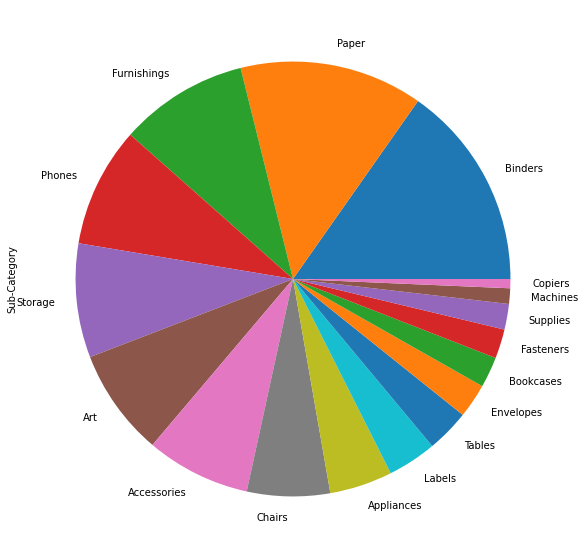

In [ ]:
plt.figure(figsize=(15,10))
db['Sub-Category'].value_counts().plot.pie()
plt.show()

Maximum sales from different State 

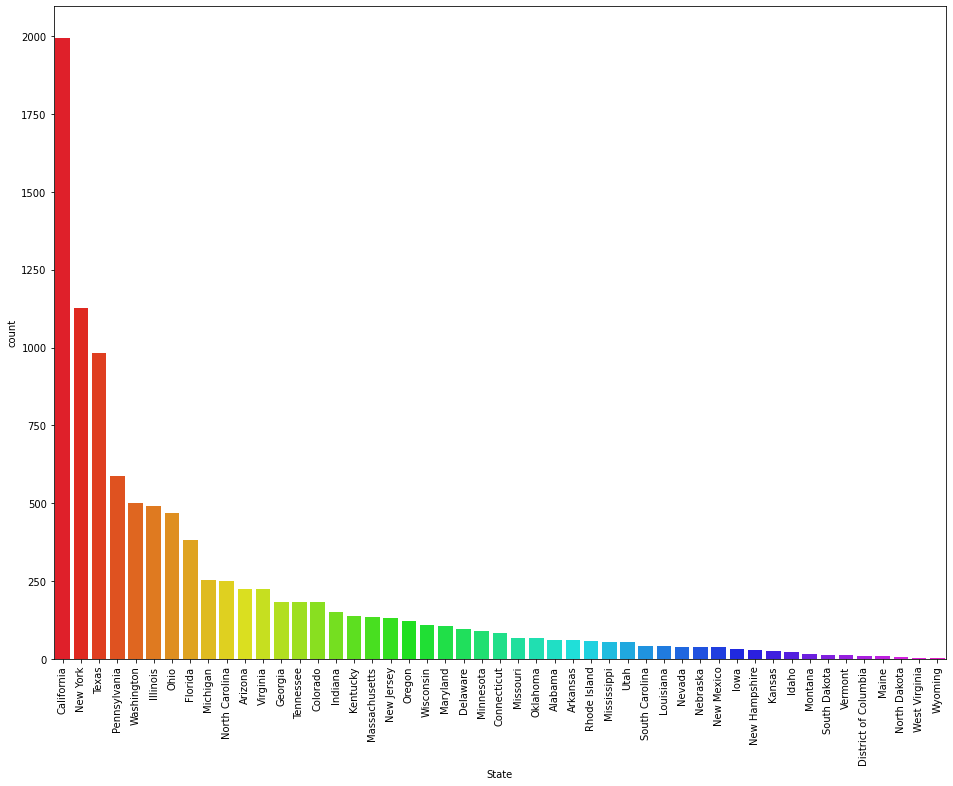

In [ ]:
plt.figure(figsize=(16,12))
sb.countplot(x='State', data = db, palette= 'gist_rainbow',order=db['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

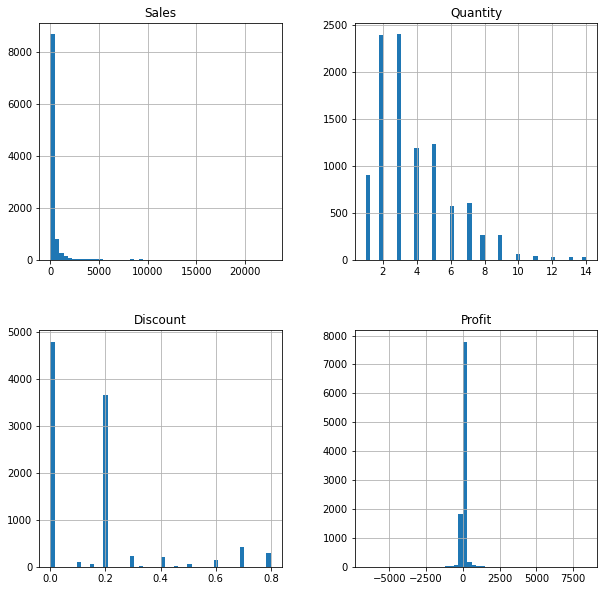

In [ ]:
db.hist(figsize=(10,10), bins= 50)
plt.show()

**Maximum profit is in Office supplies**

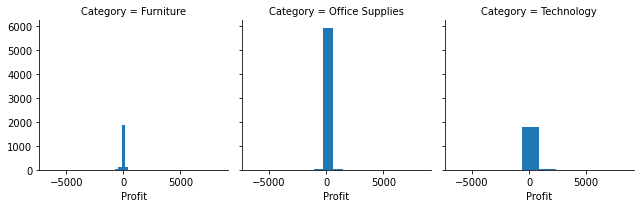

In [ ]:
p = sb.FacetGrid(db, col ='Category')
p.map(plt.hist, 'Profit')

**The western region has the max sales**

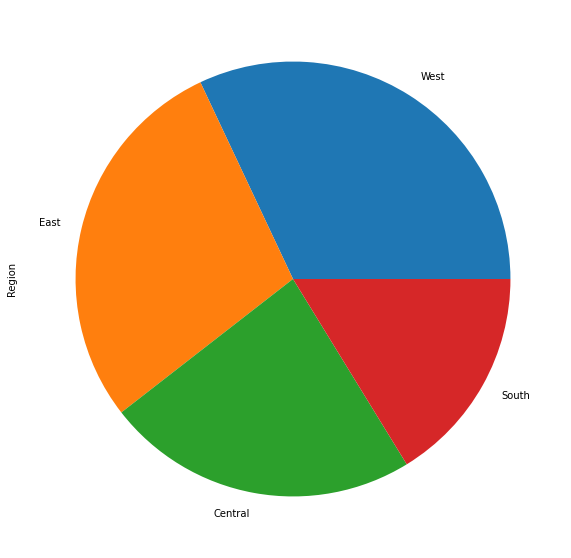

In [ ]:
plt.figure(figsize=(15,10))
db['Region'].value_counts().plot.pie()
plt.show()

In [ ]:
db['Profit'].describe()  

count    9977.00000
mean       28.69013
std       234.45784
min     -6599.97800
25%         1.72620
50%         8.67100
75%        29.37200
max      8399.97600
Name: Profit, dtype: float64

In [ ]:
print(db.Profit.skew())

7.554748459862763


**Removal of outliers in the profit column**

we have an univariate outlier here 
- a distribution of values in a single feature space.


In [ ]:
Q1 = db['Profit'].quantile(0.10)
Q3 = db['Profit'].quantile(0.90)
Q1, Q3

(-15.549119999999998, 89.3142)

**All the outliers are removed here**

In [ ]:
db.Profit = np.where(db.Profit<-15.54911, -15.54911, db.Profit)
db.Profit = np.where(db.Profit>89.3142, 89.3142, db.Profit)
print(db.Profit.skew())

1.1759226256738289


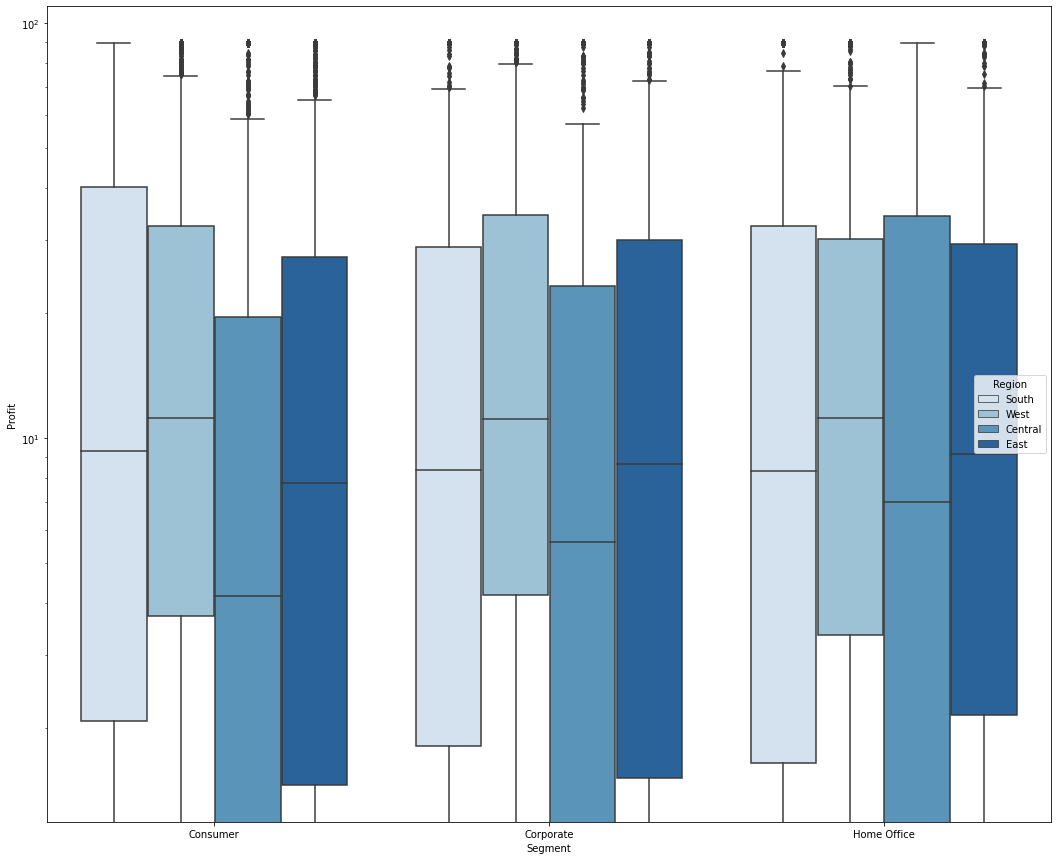

In [ ]:
plt.figure(figsize= (18,15))
a = sb.boxplot(x = 'Segment', y= 'Profit', hue = 'Region', data = db, palette='Blues')
a.set_yscale('log')  #in order to use a skewed data we have to apply a log transformation over the whole set of values to discover patterns in the data and make it usable for the statistical model.
plt.show()

**Profit according to the region and sub-category**

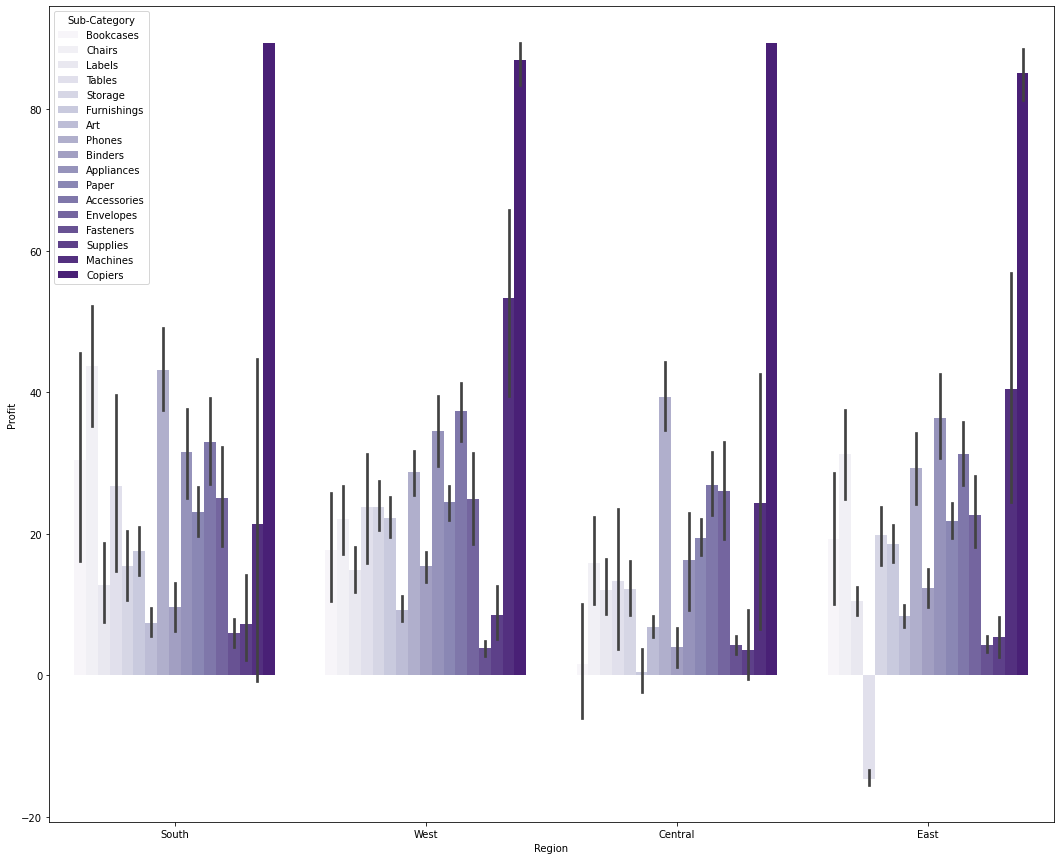

In [ ]:
plt.figure(figsize= (18,15))
sb.barplot(data = db,x = 'Region', y= 'Profit', hue = 'Sub-Category',  palette='Purples')
plt.show()

**Profit according to the region and category**

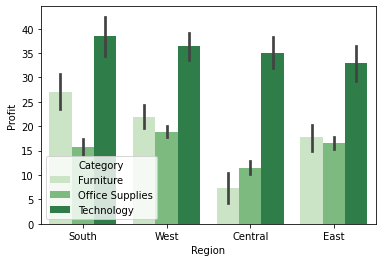

In [ ]:
sb.barplot(data = db,x = 'Region', y= 'Profit', hue = 'Category',  palette='Greens')
plt.show()

**Discount VS Profit**



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


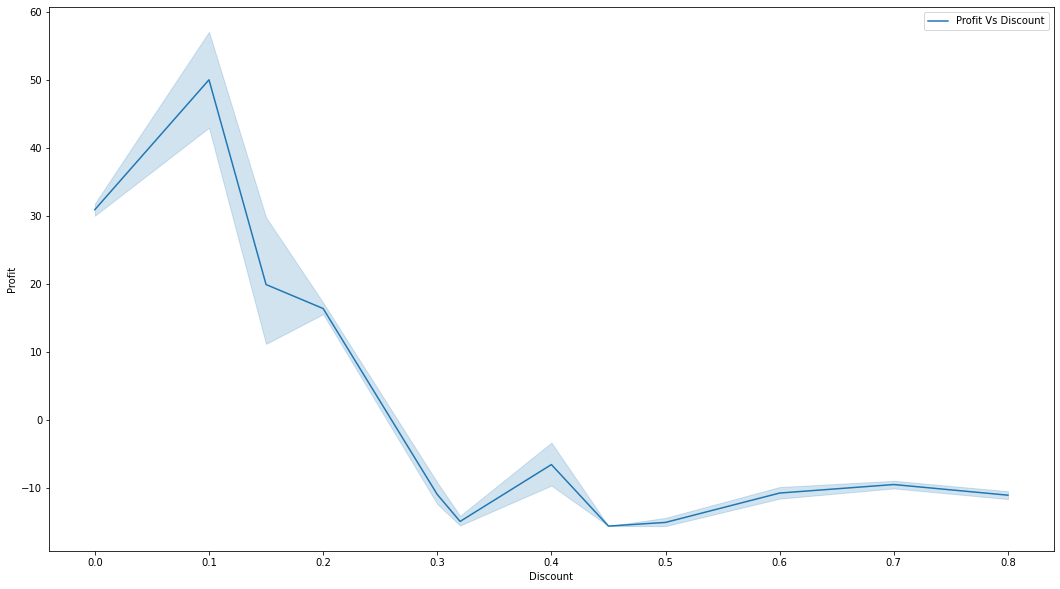

In [ ]:
plt.figure(figsize=(18,10))
sb.lineplot('Discount', 'Profit',data= db, label='Profit Vs Discount')
plt.legend()

Discount and profit are inversely proportional to each other

Conclusion:
1. If we reduce discounts profits will increase
2. Also, to improve sales we need discounts which attract customers 
3. Hence discount shouldn't be too high or too low so it won't affect the profit and sales.